### Loading Data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\routj\Downloads\winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [4]:
df.shape

(6497, 14)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


### Input and Target Variable

`Input`
- 1)fixed acidity	
-  2)volatile acidity
- 3)citric acid
- 4)residual sugar	
- 5)chlorides	
- 6)free sulfur dioxide	
- 7)total sulfur dioxide	
- 8)density	
- 9)pH
- 10)sulphates
- 11)alcohol
- 12)good
- 13)color

`Target Variable`
- 1)quality

### Type of ML Task

* Classification

### Evaluation Metric

* Accuracy

In [7]:
import sklearn

In [8]:
y = df.pop("quality")
X = df

### Splitting the dataset into Training and Testing

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(4872, 13) (4872,)
(1625, 13) (1625,)


### Separate Numerical and Categorical Features

In [10]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [11]:
X_train_cat.head()

,color
3731,white
1651,white
5060,white
1303,red
474,red


In [12]:
X_train_num.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
3731,7.1,0.22,0.32,16.90,0.056,49.0,158.0,0.99980,3.37,0.38,9.6,0
1651,6.2,0.16,0.33,1.10,0.057,21.0,82.0,0.99100,3.32,0.46,10.9,1
5060,6.7,0.24,0.30,3.85,0.042,105.0,179.0,0.99189,3.04,0.59,11.3,1
1303,8.0,0.28,0.44,1.80,0.081,28.0,68.0,0.99501,3.36,0.66,11.2,0
474,10.5,0.28,0.51,1.70,0.080,10.0,24.0,0.99820,3.20,0.89,9.4,0


### Data preparation on train data

### Numerical Feature Transformation: Applying Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
3731,-0.088021,-0.728201,0.005177,2.485175,-0.005890,1.029723,0.744625,1.752513,0.951116,-1.009331,-0.752815,-0.493127
1651,-0.785384,-1.090723,0.073901,-0.919647,0.022270,-0.530152,-0.596653,-1.250263,0.639915,-0.478861,0.340737,2.027875
5060,-0.397960,-0.607360,-0.132272,-0.327035,-0.400119,4.149473,1.115241,-0.946574,-1.102807,0.383154,0.677215,2.027875
1303,0.609341,-0.365678,0.829868,-0.768800,0.698091,-0.140184,-0.843731,0.118047,0.888876,0.847315,0.593095,-0.493127
474,2.546459,-0.365678,1.310939,-0.790350,0.669932,-1.142960,-1.620260,1.206553,-0.106966,2.372417,-0.921054,-0.493127


In [14]:

print("Number of Numerical Features:", scaler.n_features_in_)
print("Output Feature Names:", scaler.get_feature_names_out())
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 12
Output Feature Names: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'good']
Mean of each column: [7.21359811e+00 3.40522373e-01 3.19246716e-01 5.36760057e+00
 5.62091544e-02 3.05163177e+01 1.15807779e+02 9.94664049e-01
 3.21718596e+00 5.32216749e-01 1.04949364e+01 1.95607553e-01]
Std of each column: [1.29057716e+00 1.65507068e-01 1.45508942e-01 4.64047865e+00
 3.55123417e-02 1.79501565e+01 5.66623750e+01 2.93062143e-03
 1.60668196e-01 1.50809569e-01 1.18878662e+00 3.96667667e-01]


### Categorical Feature Transformation: Applying Label

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

X_train_cat_transformed = X_train_cat.copy()

label_encoder = LabelEncoder()

for i in X_train_cat.columns:
    X_train_cat_transformed[i] = label_encoder.fit_transform(X_train_cat[i])

X_train_cat_transformed.head()


,color
3731,1
1651,1
5060,1
1303,0
474,0


### Concatenate X_train_num_transformed and X_train_cat_transformed

In [16]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color
3731,-0.088021,-0.728201,0.005177,2.485175,-0.005890,1.029723,0.744625,1.752513,0.951116,-1.009331,-0.752815,-0.493127,1
1651,-0.785384,-1.090723,0.073901,-0.919647,0.022270,-0.530152,-0.596653,-1.250263,0.639915,-0.478861,0.340737,2.027875,1
5060,-0.397960,-0.607360,-0.132272,-0.327035,-0.400119,4.149473,1.115241,-0.946574,-1.102807,0.383154,0.677215,2.027875,1
1303,0.609341,-0.365678,0.829868,-0.768800,0.698091,-0.140184,-0.843731,0.118047,0.888876,0.847315,0.593095,-0.493127,0
474,2.546459,-0.365678,1.310939,-0.790350,0.669932,-1.142960,-1.620260,1.206553,-0.106966,2.372417,-0.921054,-0.493127,0


### Step5:Data Preparation on test data

In [17]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

### Numerical Feature Transformation on test data

In [18]:

X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
5316,-0.707899,-0.969882,-0.544617,-0.424008,-0.090367,-0.585862,0.056338,-0.318720,-0.667126,-0.081008,-1.089293,-0.493127
5210,-0.320475,-1.211564,-0.956963,-0.854998,-0.259323,-0.028764,-0.455466,-1.031880,0.328715,0.051610,0.593095,-0.493127
3518,0.066948,-0.728201,1.242214,1.795591,-0.203004,1.419691,1.291725,1.616023,0.141995,0.847315,-1.257531,-0.493127
1622,0.299402,1.990716,-1.231860,-0.833449,0.500976,-0.307313,0.921109,-0.328957,-1.040567,-0.147317,-1.005173,-0.493127
2443,0.066948,-0.788621,-0.200996,-0.811899,-0.625393,-0.084474,0.038689,-1.011406,0.515435,-0.213625,0.424856,2.027875


### Categorical Feature transformation on test data

In [19]:
X_test_cat_transformed = X_test_cat.copy()
for i in X_train_cat.columns:
    X_test_cat_transformed[i] = label_encoder.transform(X_test_cat[i])

X_test_cat_transformed.head()


,color
5316,1
5210,1
3518,1
1622,1
2443,1


### Concatenate X_test_num_transformed and X_test_cat_transformed

In [20]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color
5316,-0.707899,-0.969882,-0.544617,-0.424008,-0.090367,-0.585862,0.056338,-0.318720,-0.667126,-0.081008,-1.089293,-0.493127,1
5210,-0.320475,-1.211564,-0.956963,-0.854998,-0.259323,-0.028764,-0.455466,-1.031880,0.328715,0.051610,0.593095,-0.493127,1
3518,0.066948,-0.728201,1.242214,1.795591,-0.203004,1.419691,1.291725,1.616023,0.141995,0.847315,-1.257531,-0.493127,1
1622,0.299402,1.990716,-1.231860,-0.833449,0.500976,-0.307313,0.921109,-0.328957,-1.040567,-0.147317,-1.005173,-0.493127,1
2443,0.066948,-0.788621,-0.200996,-0.811899,-0.625393,-0.084474,0.038689,-1.011406,0.515435,-0.213625,0.424856,2.027875,1


### Model Training and Testing Phase

### Using KNN classifier

In [21]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

print('Accuracy Score',metrics.accuracy_score(y_test, y_test_pred))


Accuracy Score 0.676923076923077
CPU times: total: 15.6 ms
Wall time: 557 ms


In [49]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Measure training time
train_start_time = time.time()
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)
train_end_time = time.time()

# Measure testing time
test_start_time = time.time()
y_test_pred = classifier.predict(X_test_transformed)
test_end_time = time.time()

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Calculate times
training_time = train_end_time - train_start_time
testing_time = test_end_time - test_start_time

# Print results
print("Accuracy:", accuracy)
print("Training time: {:.2f} seconds".format(training_time))
print("Testing time: {:.2f} seconds".format(testing_time))


Accuracy: 0.676923076923077
Training time: 0.02 seconds
Testing time: 0.34 seconds


In [22]:
output_df = pd.DataFrame({'Actual': y_test})

In [23]:
output_df['KNeighborsClassifier Predictions'] = y_test_pred

output_df

,Actual,KNeighborsClassifier Predictions
5316,6,6
5210,6,6
3518,6,5
1622,5,4
2443,8,7
...,...,...
2152,7,7
4019,7,7
3732,6,6
1315,6,5


C:\Users\routj\AppData\Local\Temp\ipykernel_8172\3727757528.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df['Actual'],palette='pastel',label="actual")
C:\Users\routj\AppData\Local\Temp\ipykernel_8172\3727757528.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df['KNeighborsClassifier Predictions'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)


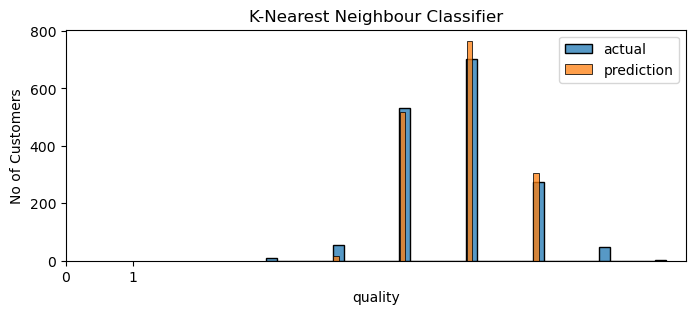

In [24]:
fig, (ax1) = plt.subplots(1, figsize=(8, 3))
sns.histplot(output_df['Actual'],palette='pastel',label="actual")
sns.histplot(output_df['KNeighborsClassifier Predictions'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)
plt.xlabel('quality')
plt.ylabel('No of Customers')
plt.title('K-Nearest Neighbour Classifier')
plt.xticks([0, 1])  
plt.legend()

### Using Logistics Regression

In [25]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

print('Accuracy Score',metrics.accuracy_score(y_test, y_test_pred))


Accuracy Score 0.6793846153846154
CPU times: total: 250 ms
Wall time: 205 ms


C:\Users\routj\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Measure training time
train_start_time = time.time()
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)
train_end_time = time.time()

# Measure testing time
test_start_time = time.time()
y_test_pred = classifier.predict(X_test_transformed)
test_end_time = time.time()

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Calculate times
training_time = train_end_time - train_start_time
testing_time = test_end_time - test_start_time

# Print results
print("Accuracy:", accuracy)
print("Training time: {:.2f} seconds".format(training_time))
print("Testing time: {:.2f} seconds".format(testing_time))


Accuracy: 0.6793846153846154
Training time: 0.31 seconds
Testing time: 0.00 seconds


C:\Users\routj\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
output_df = pd.DataFrame({'Actual': y_test})

In [27]:
output_df['LogisticRegression Predictions'] = y_test_pred

output_df

,Actual,LogisticRegression Predictions
5316,6,5
5210,6,6
3518,6,6
1622,5,5
2443,8,7
...,...,...
2152,7,7
4019,7,7
3732,6,6
1315,6,5


C:\Users\routj\AppData\Local\Temp\ipykernel_8172\1768253725.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df['Actual'],palette='pastel',label="actual")
C:\Users\routj\AppData\Local\Temp\ipykernel_8172\1768253725.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df['LogisticRegression Predictions'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)


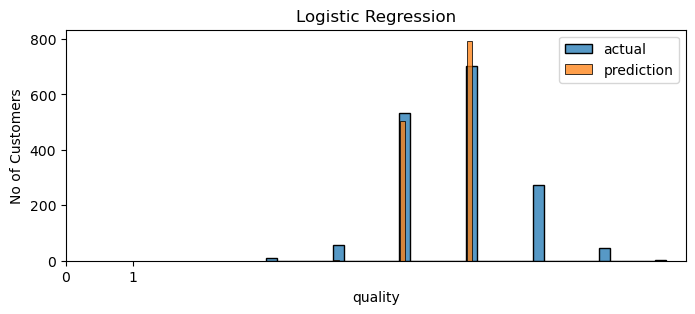

In [28]:
fig, (ax1) = plt.subplots(1, figsize=(8, 3))
sns.histplot(output_df['Actual'],palette='pastel',label="actual")
sns.histplot(output_df['LogisticRegression Predictions'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)
plt.xlabel('quality')
plt.ylabel('No of Customers')
plt.title('Logistic Regression')
plt.xticks([0, 1])  
plt.legend()

### Using support vector machine

In [29]:
%%time
from sklearn import svm

SVM = svm.SVC(kernel='linear')

# Training the model
SVM.fit(X_train_transformed, y_train)

# Prediction on unseen data
y_test_pred = SVM.predict(X_test_transformed)

# Evaluation
print('Accuracy Score',metrics.accuracy_score(y_test, y_test_pred))


Accuracy Score 0.676923076923077
CPU times: total: 1.45 s
Wall time: 2.51 s


In [47]:
import time
from sklearn import svm

from sklearn import metrics
import matplotlib.pyplot as plt

# Measure training time
train_start_time = time.time()

SVM = svm.SVC(kernel='linear')

SVM.fit(X_train_transformed, y_train)
train_end_time = time.time()

# Measure testing time
test_start_time = time.time()
y_test_pred = SVM.predict(X_test_transformed)
test_end_time = time.time()

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Calculate times
training_time = train_end_time - train_start_time
testing_time = test_end_time - test_start_time

# Print results
print("Accuracy:", accuracy)
print("Training time: {:.2f} seconds".format(training_time))
print("Testing time: {:.2f} seconds".format(testing_time))



Accuracy: 0.676923076923077
Training time: 1.95 seconds
Testing time: 0.47 seconds


In [30]:
output_df = pd.DataFrame({'Actual': y_test})

In [31]:
output_df['svm Predictions'] = y_test_pred

output_df

,Actual,svm Predictions
5316,6,5
5210,6,6
3518,6,6
1622,5,5
2443,8,7
...,...,...
2152,7,7
4019,7,7
3732,6,6
1315,6,5


C:\Users\routj\AppData\Local\Temp\ipykernel_8172\1280483405.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df['Actual'],palette='pastel',label="actual")
C:\Users\routj\AppData\Local\Temp\ipykernel_8172\1280483405.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df['svm Predictions'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)


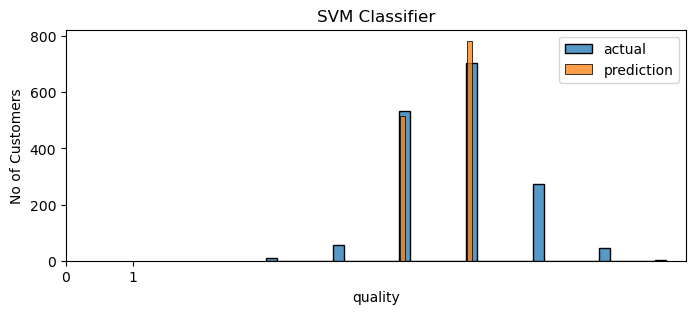

In [32]:
fig, (ax1) = plt.subplots(1, figsize=(8, 3))
sns.histplot(output_df['Actual'],palette='pastel',label="actual")
sns.histplot(output_df['svm Predictions'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)
plt.xlabel('quality')
plt.ylabel('No of Customers')
plt.title('SVM Classifier')
plt.xticks([0, 1])  
plt.legend()

### Using DecisionTree 

In [33]:
%%time
# Import the Algorithm
from sklearn.tree import DecisionTreeClassifier

# Create the object
classifier = DecisionTreeClassifier()

# Training the model
classifier.fit(X_train_transformed, y_train)

# Prediction on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Evaluation
print('Accuracy Score',metrics.accuracy_score(y_test, y_test_pred))


Accuracy Score 0.7249230769230769
CPU times: total: 93.8 ms
Wall time: 309 ms


In [34]:
output_df = pd.DataFrame({'Actual': y_test})

In [35]:
output_df['DecisionTreeClassifier Predictions'] = y_test_pred

output_df

,Actual,DecisionTreeClassifier Predictions
5316,6,6
5210,6,6
3518,6,6
1622,5,6
2443,8,8
...,...,...
2152,7,7
4019,7,7
3732,6,6
1315,6,6


In [45]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Measure training time
train_start_time = time.time()
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)
train_end_time = time.time()

# Measure testing time
test_start_time = time.time()
y_test_pred = classifier.predict(X_test_transformed)
test_end_time = time.time()

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Calculate times
training_time = train_end_time - train_start_time
testing_time = test_end_time - test_start_time

# Print results
print("Accuracy:", accuracy)
print("Training time: {:.2f} seconds".format(training_time))
print("Testing time: {:.2f} seconds".format(testing_time))



Accuracy: 0.7193846153846154
Training time: 0.13 seconds
Testing time: 0.00 seconds


### Using RandomForest

In [36]:
%%time
# Import the Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Create the object
classifier = RandomForestClassifier()

# Training the model
classifier.fit(X_train_transformed, y_train)

# Prediction on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Evaluation
print('Accuracy Score',metrics.accuracy_score(y_test, y_test_pred))


Accuracy Score 0.7753846153846153
CPU times: total: 2.03 s
Wall time: 2.9 s


In [50]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Measure training time
train_start_time = time.time()
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)
train_end_time = time.time()

# Measure testing time
test_start_time = time.time()
y_test_pred = classifier.predict(X_test_transformed)
test_end_time = time.time()

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Calculate times
training_time = train_end_time - train_start_time
testing_time = test_end_time - test_start_time

# Print results
print("Accuracy:", accuracy)
print("Training time: {:.2f} seconds".format(training_time))
print("Testing time: {:.2f} seconds".format(testing_time))


Accuracy: 0.7735384615384615
Training time: 2.48 seconds
Testing time: 0.08 seconds


In [37]:
output_df = pd.DataFrame({'Actual': y_test})

In [38]:
output_df['RandomForestClassifier Predictions'] = y_test_pred

output_df


,Actual,RandomForestClassifier Predictions
5316,6,5
5210,6,6
3518,6,6
1622,5,5
2443,8,8
...,...,...
2152,7,7
4019,7,7
3732,6,6
1315,6,6


C:\Users\routj\AppData\Local\Temp\ipykernel_8172\147098761.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df['Actual'],palette='pastel',label="actual")
C:\Users\routj\AppData\Local\Temp\ipykernel_8172\147098761.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(output_df['RandomForestClassifier Predictions'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)


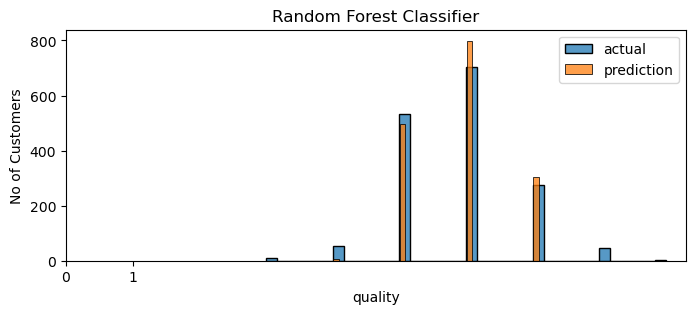

In [39]:
fig, (ax1) = plt.subplots(1, figsize=(8, 3))
sns.histplot(output_df['Actual'],palette='pastel',label="actual")
sns.histplot(output_df['RandomForestClassifier Predictions'],palette='pastel',label="prediction", binwidth=0.1, shrink=0.8)
plt.xlabel('quality')
plt.ylabel('No of Customers')
plt.title('Random Forest Classifier')
plt.xticks([0, 1])  
plt.legend()

In [40]:
models = ['Logistic Regression','knn','Decision Tree','Random Forest','SVM']
accuracy = [67.93,67.69,72.24,77.81,67.69]

In [41]:
Models_Accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy})

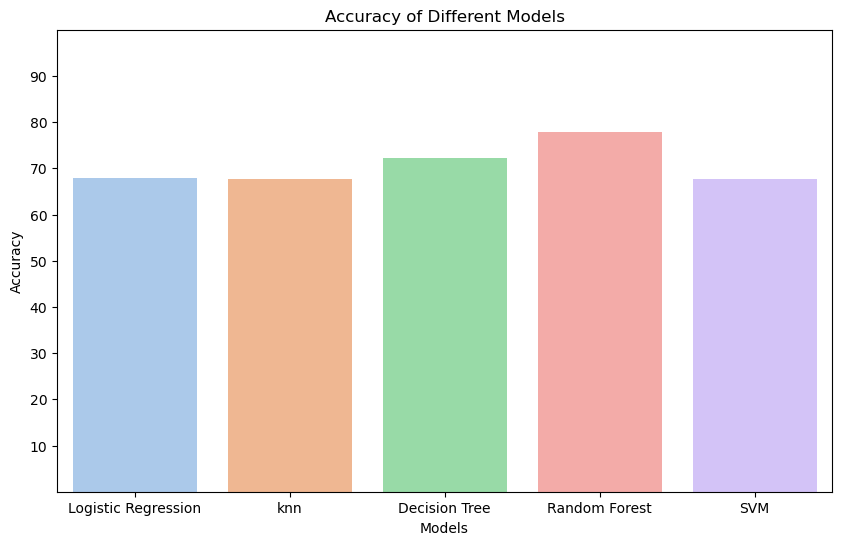

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=Models_Accuracy_df, palette='pastel')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 100)
plt.yticks(range(10,100,10))
plt.show()

### Conclusion

`OBSERVATION`
- Random Forest predicts highest accuracy than other models.
- Decision Tree also showing better performance than Logistic,KNN and SVM.
- SVM and KNN show similar kind of performance.
- Logistic regression aslo perform well.

In [61]:
models = ['Logistic Regression','knn','Decision Tree','SVM']
accuracy = [67.93,67.69,72.24,67.69]

In [62]:
Models_Accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy})

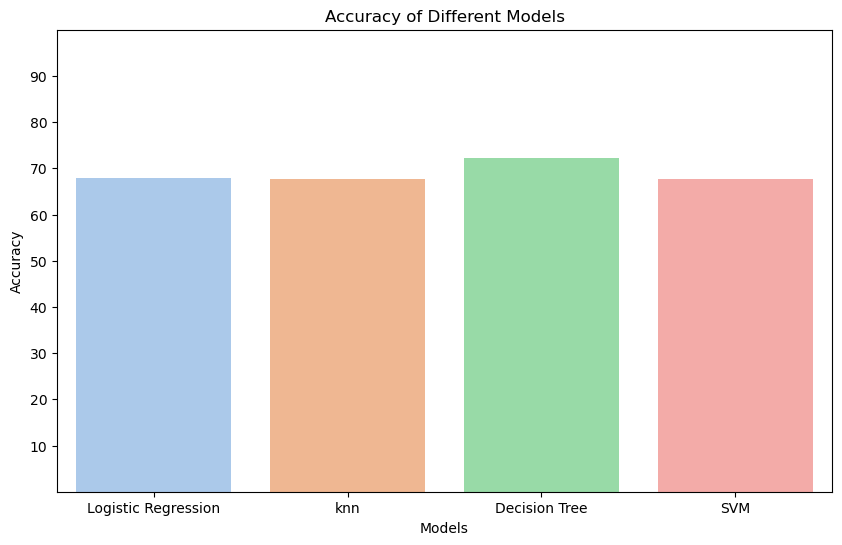

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=Models_Accuracy_df, palette='pastel')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 100)
plt.yticks(range(10,100,10))
plt.show()

### Training Time

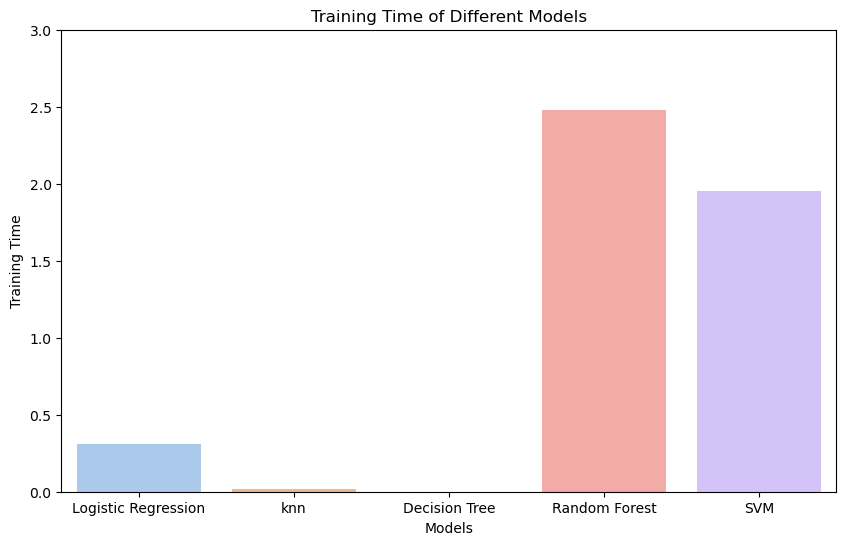

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = ['Logistic Regression', 'knn', 'Decision Tree', 'Random Forest', 'SVM']
time = [0.31, 0.02, 0.00, 2.48, 1.95]

# Create DataFrame
Models_time_df = pd.DataFrame({'Model': models, 'time': time})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='time', data=Models_time_df, palette='pastel')
plt.xlabel('Models')
plt.ylabel('Training Time')
plt.title('Training Time of Different Models')
plt.ylim(0, 3)  # Adjust y-axis limit to better reflect the actual times
plt.yticks([i*0.5 for i in range(7)])  # Set y-ticks at 0.5-second intervals

# Display plot
plt.show()


### Testing Time

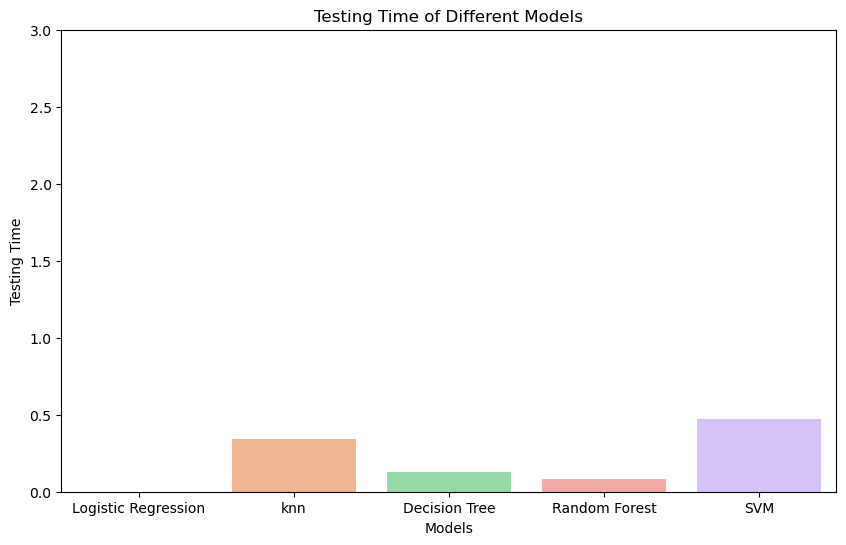

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = ['Logistic Regression', 'knn', 'Decision Tree', 'Random Forest', 'SVM']
time =[0.00,0.34,0.13, 0.08,0.47]

# Create DataFrame
Models_time_df = pd.DataFrame({'Model': models, 'time': time})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='time', data=Models_time_df, palette='pastel')
plt.xlabel('Models')
plt.ylabel('Testing Time')
plt.title('Testing Time of Different Models')
plt.ylim(0, 3)  # Adjust y-axis limit to better reflect the actual times
plt.yticks([i*0.5 for i in range(7)])  # Set y-ticks at 0.5-second intervals

# Display plot
plt.show()
